In [62]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import math
import os
import yaml
import itertools

In [63]:
# new baseline
detection_boxes_new_comm = [0, 7.9686, 9.3284, 10.3390, 11.3430, 12.6657, 13.6646, 14.2483, 14.6629]
detection_boxes_new = [
    [0.7137, 0.7216, 0.7338, 0.7476, 0.7626, 0.7851, 0.7969, 0.8027, 0.8070],
    [0.6728, 0.6784, 0.6867, 0.6990, 0.7136, 0.7324, 0.7439, 0.7501, 0.7528],
    [0.5742, 0.5758, 0.5785, 0.5829, 0.5906, 0.6059, 0.6086, 0.6123, 0.6144],
]

In [64]:
path=r"C:\Users\Yunqiao Yang\Desktop\Co-perception\pose error"

In [65]:
dict_out={"ap30":[],"ap50":[],"ap70":[]}

In [66]:
files = os.listdir(path)
for file in files:
        name, ext = os.path.splitext(file)
        if ext == ".yaml":
            with open(os.path.join(path, name+ext), 'r') as f:
                getdict = yaml.load(f, Loader=yaml.FullLoader)
            #print(getdict.keys())
            for x in dict_out.keys():
                #dict_out[x].append(getdict[x])
                dict_out[x]=getdict[x]

In [67]:
list(dict_out.values())

[[0.965292372825121,
  0.9590915455613832,
  0.8960013047514744,
  0.6950771088216572],
 [0.9609567310210533,
  0.9397886804626278,
  0.6967602632340868,
  0.3405876826862233],
 [0.9233629545536659,
  0.6552821558246105,
  0.19071972627471717,
  0.044750211044306924]]

In [68]:
pose_error_early=[0,0.2,0.4,0.6]
result_early=[
    [0.965292372825121,
  0.9590915455613832,
  0.8960013047514744,
  0.6950771088216572],
 [0.9609567310210533,
  0.9397886804626278,
  0.6967602632340868,
  0.3405876826862233],
 [0.9233629545536659,
  0.6552821558246105,
  0.19071972627471717,
  0.044750211044306924]
]

In [69]:
pose_error_late=[0,0.2,0.4,0.6]
result_late=[
    [0.9513341694704983,0.9426501816319077,0.796441092190511,0.6397698915874019],
    [0.9449730997984085,0.8414429531270692,0.5097967224839445,0.40476282127523305],
    [0.885884353029367,0.480652409069102,0.26579752640364057,0.2410458486397034]
]

In [70]:
pose_error_no=[0,0.2,0.4,0.6]
result_no=[
    [0.79042946422024,0.7894807510724199,0.7868893786864928,0.7850979252244735],
    [0.7788973184923571,0.7766255015466403,0.7732388022048778,0.7719629204378065],
    [0.6744049078136254,0.6704452474098879,0.6685557806060815,0.667701078580681]
]

In [71]:
pose_error_early04=[0,0.2,0.4,0.6]
result_early04=[
    [0.8334265253829396,0.8335131790152387,0.83355120227769,0.8332919503256119],
    [0.7711782911291784,0.770797990312487,0.7710219663364186,0.7706013779129316],
    [0.6132239245704445,0.6129060399079157,0.6132207864075435,0.6128366278405865]
]

In [72]:
pose_error_late04=[0,0.2,0.4,0.6]
result_late04=[
    [0.8293859795435623,0.8139358703523534,0.7788985976617643,0.7495452123423452],
    [0.6999907869636153,0.6795387067057581,0.643047154908565,0.6338272336610031],
    [0.5105841699041674,0.49410280639317133,0.4862004056588915,0.49545137083182206]
]

In [73]:
pose_error_no04=[0,0.2,0.4,0.6]
result_no04=[
    [0.7364986366001193,0.7320944127039417,0.7217173611947331,0.700020880218611],
    [0.6855452355217888,0.6835550264422495,0.6741500389814749,0.6553607402368494],
    [0.5673034921133598,0.5662723000135105,0.5591365603287166,0.5446848435406418]
]

In [74]:
savepath=r"c:\Users\Yunqiao Yang\Desktop\Co-perception\pose error\opv2vtrain绝对.png"

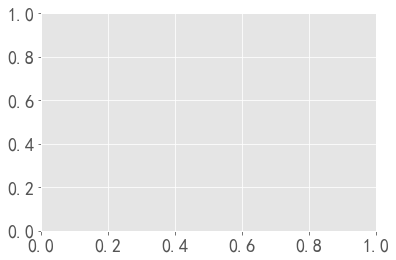

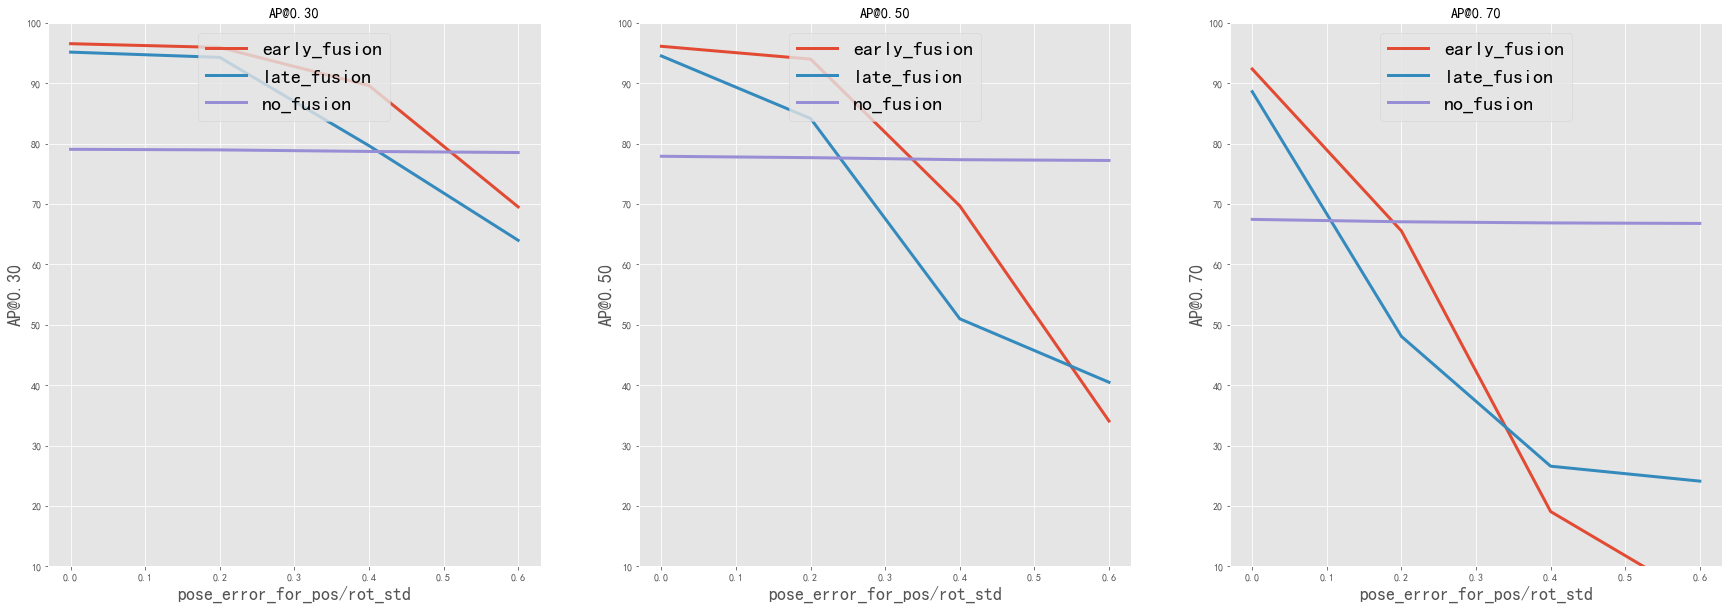

In [75]:
Late_cost = [0,14]
label_size = 18
metrics = ['AP@0.30', 'AP@0.50', 'AP@0.70']
plt.tick_params(labelsize=label_size)
fig = plt.figure(figsize=(30, 10))
for i, metric in enumerate(metrics[:3]):
    plt.subplot(1, 3, 1 + i)
    # plt.plot(detection_boxes_new_comm, [x * 100 for x in detection_boxes_new[i]],
    #         label='Points in Detection boxes(Baseline_new)', linewidth=3)
    plt.ylim(10, 100)
    plt.plot(pose_error_early, [x * 100 for x in result_early[i]], label='early_fusion', linewidth=3)
    plt.plot(pose_error_late, [x * 100 for x in result_late[i]], label='late_fusion', linewidth=3)
    plt.plot(pose_error_no, [x * 100 for x in result_no[i]], label='no_fusion', linewidth=3)
    # plt.plot(pose_error_early04, [x * 100 for x in result_early04[i]],'--', label='early_fusion', linewidth=3)
    # plt.plot(pose_error_late04, [x * 100 for x in result_late04[i]],'--', label='late_fusion', linewidth=3)
    # plt.plot(pose_error_no04, [x * 100 for x in result_no04[i]], '--',label='no_fusion', linewidth=3)
    plt.ylabel(metric, size=label_size)
    plt.xlabel('pose_error_for_pos/rot_std',size=label_size)
    plt.title(metric)
    plt.legend(loc='upper center',prop={'size': 20})
plt.savefig(savepath)